# TSModel Accuracy Tests

This notebook visualises the flux model error caused by the approximations in the TSModel transmission spectroscopy model.

**Author:** Hannu Parviainen </br>
**Edited:** 2025-07-21

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.optimize import minimize

from pytransit import RRModel, TSModel
from pytransit.orbits import i_from_ba

In [2]:
def calculate_models(ks, times = None, ldc = None, t0=0.0, p=2.0, a=8.0, b=0.0):
    ks = asarray(ks)
    if times is None:
        times = linspace(-0.1, 0.1, 500)
    if ldc is None:
        ldc = tile([0.4, 0.4], (1, ks.size, 1))
    inc = i_from_ba(b, a)

    m0 = RRModel('power-2', ng=100, nzin=50, nzlimb=50)
    m1 = TSModel('power-2', ng=100, nzin=50, nzlimb=50)

    for m in m0, m1:
        m.set_data(times)

    f0 = zeros((ks.size, times.size))
    for i, k in enumerate(ks):
        f0[i] = m0.evaluate(k, ldc[0, i], t0, p, a, inc)

    f1 = m1.evaluate(ks, ldc, t0, p, a, inc)[0]

    return f0, f1, m0, m1, ldc

In [3]:
def optimize_tsmodel(par):
    f0, f1, m0, m1, ldc = calculate_models(**par)
    
    def minfun(x, p):
        ks = x[2:]
        a, b = x[:2]
        inc = i_from_ba(b, a)
        return ((f0 - m1.evaluate(ks, ldc, 0.0, p, a, inc))**2).sum()
        
    res = minimize(minfun, r_[par['a'], par['b'], par['ks']], (par['p']), tol=1e-7)
    return res

In [4]:
par_toi_836 = dict(p=8.6, a=25, b=0.25, ks=linspace(sqrt(1100e-6), sqrt(1300e-6), 21))
par_wasp_39 = dict(p=4.1, a=11, b=0.45, ks=linspace(0.144, 0.154, 42))

par = par_wasp_39
par = par_toi_836

## Case 1: Hot Jupiter

In [5]:
par = par_wasp_39
res = optimize_tsmodel(par)

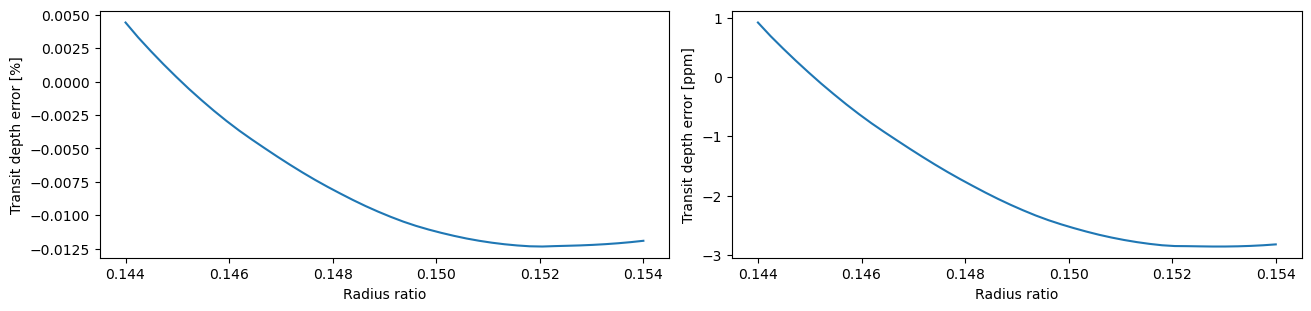

In [6]:
fig, axs = subplots(1, 2, figsize=(13, 3), constrained_layout=True)
axs[0].plot(par['ks'], 1e2*(res.x[2:]**2 - par['ks']**2) / (par['ks']**2))
axs[1].plot(par['ks'], 1e6*(res.x[2:]**2 - par['ks']**2))

setp(axs[0], xlabel='Radius ratio', ylabel='Transit depth error [%]')
setp(axs[1], xlabel='Radius ratio', ylabel='Transit depth error [ppm]');

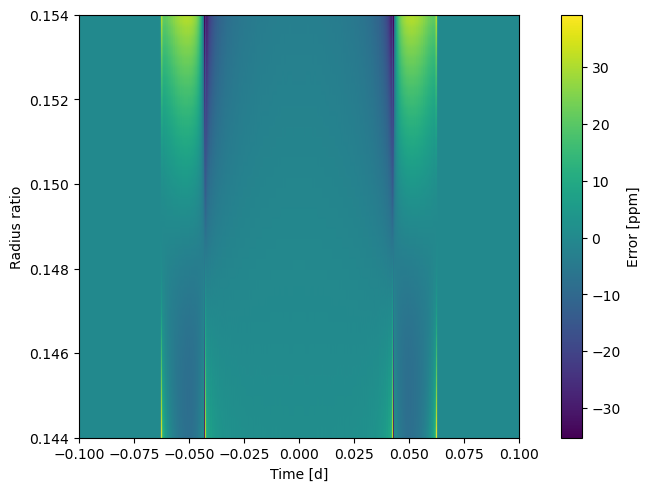

In [7]:
f0, f1, m0, m1, ldc = calculate_models(**par)

fig, ax = subplots(constrained_layout=True)
l = ax.imshow(1e6*(f1 - f0), aspect='auto', origin='lower', extent=(-0.1, 0.1, par['ks'][0], par['ks'][-1]))
fig.colorbar(l, label='Error [ppm]')
setp(ax, xlabel='Time [d]', ylabel='Radius ratio');

In [8]:
res.x[0] - par['a'], res.x[1] - par['b']

(np.float64(-0.0018263083886651543), np.float64(0.00016431292394630814))

## Case 2: Warm Sub-Neptune

In [9]:
par = par_toi_836
res = optimize_tsmodel(par)

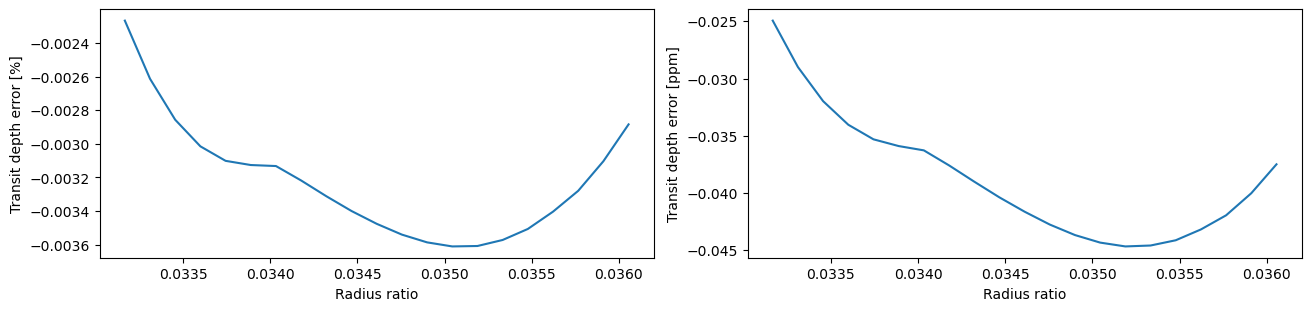

In [10]:
fig, axs = subplots(1, 2, figsize=(13, 3), constrained_layout=True)
axs[0].plot(par['ks'], 1e2*(res.x[2:]**2 - par['ks']**2) / (par['ks']**2))
axs[1].plot(par['ks'], 1e6*(res.x[2:]**2 - par['ks']**2))

setp(axs[0], xlabel='Radius ratio', ylabel='Transit depth error [%]')
setp(axs[1], xlabel='Radius ratio', ylabel='Transit depth error [ppm]');

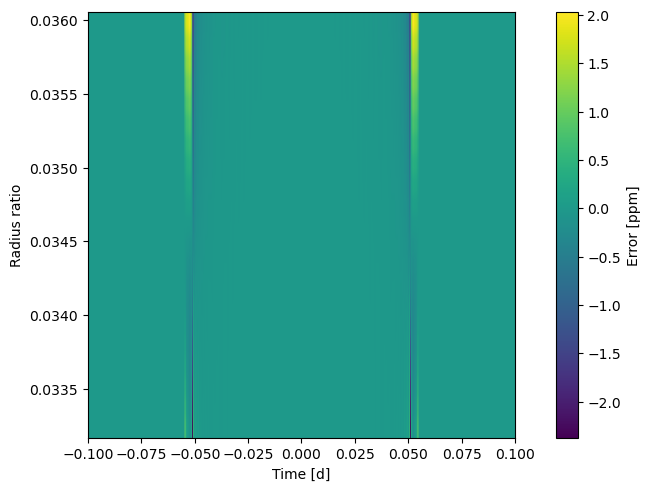

In [11]:
f0, f1, m0, m1, ldc = calculate_models(**par)

fig, ax = subplots(constrained_layout=True)
l = ax.imshow(1e6*(f1 - f0), aspect='auto', origin='lower', extent=(-0.1, 0.1, par['ks'][0], par['ks'][-1]))
fig.colorbar(l, label='Error [ppm]')
setp(ax, xlabel='Time [d]', ylabel='Radius ratio');

In [12]:
res.x[0] - par['a'], res.x[1] - par['b']

(np.float64(-1.1859578130213322e-05), np.float64(-7.80470789036869e-05))

---

<center>
    ©2025 Hannu Parviainen
</center>